<a href="https://colab.research.google.com/github/Ndifreke000/BloDI/blob/main/RPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import asyncio
import aiohttp
import time
import json

# -------------------------------------------------------
#  ALL RPC ENDPOINTS YOU PROVIDED (READY TO RUN)
# -------------------------------------------------------
RPC_ENDPOINTS = {
    "Akash": "https://akash.publicnode.dev",
    "Analog": "https://analog.publicnode.dev",
    "Aptos": "https://aptos.publicnode.dev",
    "Arbitrum Nova": "https://arbitrum.publicnode.dev/one",
    "AssetMantle": "https://assetmantle.publicnode.dev",
    "Atom (Cosmos)": "https://cosmos.publicnode.dev",
    "Axelar": "https://axelar.publicnode.dev",
    "Berachain": "https://berachain.publicnode.dev",
    "BitCanna": "https://bitcanna.publicnode.dev",
    "Blast": "https://blast.publicnode.dev",
    "Celer": "https://celer.publicnode.dev",
    "Celestia": "https://celestia.publicnode.dev",
    "Chihuahua": "https://chihuahua.publicnode.dev",
    "Chiliz": "https://chiliz.publicnode.dev",
    "Comdex": "https://comdex.publicnode.dev",
    "Coreum": "https://coreum.publicnode.dev",
    "Cosmos (IBC)": "https://cosmos.publicnode.dev",
    "Dymension": "https://dymension.publicnode.dev",
    "Elys Network": "https://elys.publicnode.dev",
    "Fetch.ai": "https://fetch.publicnode.dev",
    "Firo": "https://firo.publicnode.dev",
    "Fraxtal": "https://fraxtal.publicnode.dev",
    "HAQQ": "https://haqq.publicnode.dev",
    "IRISnet": "https://irisnet.publicnode.dev",
    "Injective": "https://injective.publicnode.dev",
    "Juno": "https://juno.publicnode.dev",
    "Kujira": "https://kujira.publicnode.dev",
    "Kusama": "https://kusama.publicnode.dev",
    "Lava": "https://lava.publicnode.dev",
    "Lumera": "https://lumera.publicnode.dev",
    "Manta": "https://manta.publicnode.dev",
    "Neutron": "https://neutron.publicnode.dev",
    "Nibiru": "https://nibiru.publicnode.dev",
    "Nolus": "https://nolus.publicnode.dev",
    "OmniFlix": "https://omniflix.publicnode.dev",
    "PulseChain": "https://pulsechain.publicnode.dev",
    "Quicksilver": "https://quicksilver.publicnode.dev",
    "Rizon": "https://rizon.publicnode.dev",
    "Rebus": "https://rebus.publicnode.dev",
    "Regen": "https://regen.publicnode.dev",
    "Saga": "https://saga.publicnode.dev",
    "Scroll": "https://scroll.publicnode.dev",
    "Sei": "https://sei.publicnode.dev",
    "Sentinel": "https://sentinel.publicnode.dev",
    "Shentu": "https://shentu.publicnode.dev",
    "Sifchain": "https://sifchain.publicnode.dev",
    "Solana": "https://solana.publicnode.dev",
    "Sonic": "https://sonic.publicnode.dev",
    "Stargaze": "https://stargaze.publicnode.dev",
    "Stride": "https://stride.publicnode.dev",
    "Sui": "https://sui.publicnode.dev",
    "Syscoin": "https://syscoin.publicnode.dev",
    "TRON": "https://tron.publicnode.dev",
    "Taiko": "https://taiko.publicnode.dev",
    "Tenet": "https://tenet.publicnode.dev",
    "Teritori": "https://teritori.publicnode.dev",
    "Terra": "https://terra.publicnode.dev",
    "Terra Classic": "https://terra-classic.publicnode.dev",
    "Unichain": "https://unichain.publicnode.dev",
    "Warden": "https://warden.publicnode.dev",
    "XPLA": "https://xpla.publicnode.dev",
    "dYdX": "https://dydx.publicnode.dev",
    "Arbitrum": "https://arb1.arbitrum.io/rpc",
    "Arbitrum_publicnode": "https://arbitrum-one.publicnode.com",
    "Ethereum_drpc": "https://eth.drpc.org",
    "Ethereum_flashbots": "https://rpc.flashbots.net",
    "Ethereum_nodies": "https://eth-pokt.nodies.app",
    "Avalanche": "https://api.avax.network/ext/bc/C/rpc",
    "Base": "https://mainnet.base.org",
    "Base_publicnode": "https://base-rpc.publicnode.com",
    "Cronos": "https://evm.cronos.org",
    "Cronos_publicnode": "https://cronos-evm.publicnode.com",
    "Polygon": "https://polygon-rpc.com",
    "Polygon_publicnode": "https://polygon-bor-rpc.publicnode.com",
    "BNB Smart Chain_publicnode": "https://bsc.publicnode.com",
    "BNB Smart Chain_bnbchain": "https://bsc-dataseed.bnbchain.org",
    "Optimism": "https://mainnet.optimism.io",
    "Optimism_publicnode": "https://optimism-rpc.publicnode.com",
    "Kava_publicnode": "https://kava-evm.publicnode.com",
    "Kava": "https://evm.kava.io",
    "Linea": "https://rpc.linea.build",
    "Linea_publicnode": "https://linea-rpc.publicnode.com",
    "Gnosis_publicnode": "https://gnosis.publicnode.com",
    "Gnosis": "https://rpc.gnosischain.com",
    "Celo_publicnode": "https://celo.publicnode.com",
    "Celo": "https://forno.celo.org",
    "ZkSync Era": "https://mainnet.era.zksync.io",
    "Moonbeam": "https://rpc.api.moonbeam.network",
    "Moonriver": "https://rpc.api.moonriver.moonbeam.network",
    "Zora": "https://rpc.zora.energy",
    "Evmos": "https://evmos-evm.publicnode.com",
    "Telos EVM": "https://mainnet.telos.net/evm",
    "Metis": "https://andromeda.metis.io/?owner=1088",
    "Mantle": "https://rpc.mantle.xyz",
    "OKXChain": "https://exchainrpc.okex.org",
    "Flare": "https://flare-api.flare.network/ext/C/rpc",
    "Songbird": "https://songbird-api.flare.network/ext/C/rpc",
    "Fuse": "https://rpc.fuse.io",
    "Aurora": "https://mainnet.aurora.dev"
}

# ETH JSON-RPC Payload
ETH_PAYLOAD = {
    "jsonrpc": "2.0",
    "method": "eth_blockNumber",
    "params": [],
    "id": 1
}

async def ping_rpc(session, chain, url):
    start = time.time()
    try:
        async with session.post(url, json=ETH_PAYLOAD, timeout=5) as resp:
            latency = (time.time() - start) * 1000
            data = await resp.json()

            # EVM block number (hex)
            block_hex = data.get("result")
            block_num = int(block_hex, 16) if block_hex else None

            return {
                "chain": chain,
                "url": url,
                "latency_ms": round(latency, 2),
                "block": block_num,
                "alive": True
            }

    except Exception:
        return {
            "chain": chain,
            "url": url,
            "latency_ms": None,
            "block": None,
            "alive": False
        }


async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [ping_rpc(session, chain, url) for chain, url in RPC_ENDPOINTS.items()]
        results = await asyncio.gather(*tasks)

    alive = [r for r in results if r["alive"]]
    dead = [r for r in results if not r["alive"]]

    print("\n=== ALIVE RPCs ===")
    for r in alive:
        print(f"{r['chain']:15} | {r['latency_ms']:>7} ms | Block: {r['block']} | {r['url']}")

    print("\n=== DEAD RPCs ===")
    for r in dead:
        print(f"{r['chain']:15} | OFFLINE | {r['url']}")

    # Save results
    with open("rpc_results.json", "w") as f:
        json.dump(results, f, indent=2)


if __name__ == "__main__":
    # Fix: Directly await main() when an event loop is already running
    # asyncio.run(main())
    import nest_asyncio
    nest_asyncio.apply()
    asyncio.run(main())


=== ALIVE RPCs ===
Akash           |  735.16 ms | Block: None | https://akash.publicnode.dev
Arbitrum Nova   |  765.81 ms | Block: None | https://arbitrum.publicnode.dev/one
AssetMantle     |  777.71 ms | Block: None | https://assetmantle.publicnode.dev
Atom (Cosmos)   |  718.06 ms | Block: None | https://cosmos.publicnode.dev
Axelar          |  594.27 ms | Block: None | https://axelar.publicnode.dev
Berachain       |  854.47 ms | Block: 13145686 | https://berachain.publicnode.dev
Blast           |  752.28 ms | Block: 27248137 | https://blast.publicnode.dev
Celer           |  871.14 ms | Block: None | https://celer.publicnode.dev
Celestia        | 1584.68 ms | Block: None | https://celestia.publicnode.dev
Chihuahua       |  786.16 ms | Block: None | https://chihuahua.publicnode.dev
Chiliz          |  776.55 ms | Block: 28853229 | https://chiliz.publicnode.dev
Comdex          |  820.49 ms | Block: None | https://comdex.publicnode.dev
Cosmos (IBC)    |   759.3 ms | Block: None | https:/

In [3]:
import json

# Load the results from the JSON file
with open("rpc_results.json", "r") as f:
    results = json.load(f)

# Filter for RPCs that returned a block number and are alive
rpcs_with_block_number = [r for r in results if r["block"] is not None and r["alive"]]

print("\n=== ALIVE RPCs with Block Number ===")
if rpcs_with_block_number:
    for r in rpcs_with_block_number:
        print(f"{r['chain']:15} | {r['latency_ms']:>7} ms | Block: {r['block']} | {r['url']}")
else:
    print("No alive RPCs returned a block number.")


=== ALIVE RPCs with Block Number ===
Berachain       |  814.23 ms | Block: 13145533 | https://berachain.publicnode.dev
Blast           |  848.66 ms | Block: 27247985 | https://blast.publicnode.dev
Chiliz          | 1205.76 ms | Block: 28853128 | https://chiliz.publicnode.dev
Dymension       |  814.98 ms | Block: 10067792 | https://dymension.publicnode.dev
HAQQ            |  829.97 ms | Block: 19181535 | https://haqq.publicnode.dev
IRISnet         |  853.74 ms | Block: 32767473 | https://irisnet.publicnode.dev
Nibiru          | 1036.22 ms | Block: 32271220 | https://nibiru.publicnode.dev
PulseChain      |  956.29 ms | Block: 25037210 | https://pulsechain.publicnode.dev
Scroll          | 1722.46 ms | Block: 24946324 | https://scroll.publicnode.dev
Sei             |  989.34 ms | Block: 179161379 | https://sei.publicnode.dev
Syscoin         | 1119.48 ms | Block: 819407 | https://syscoin.publicnode.dev
Taiko           | 1341.62 ms | Block: 3270454 | https://taiko.publicnode.dev
Tenet      

# Task
Load the RPC results from the "rpc_results.json" file into a pandas DataFrame.

## Load RPC Results

### Subtask:
Load the RPC results from the 'rpc_results.json' file into a pandas DataFrame for easier manipulation and plotting.


**Reasoning**:
The subtask requires loading the JSON data into a pandas DataFrame, so I need to import the pandas library first.



In [4]:
import pandas as pd

**Reasoning**:
Now that pandas is imported, I will load the 'rpc_results.json' file into a DataFrame named `df_rpc_results` using `pd.read_json()`.



In [5]:
df_rpc_results = pd.read_json('rpc_results.json')
print("DataFrame created successfully with the following columns:")
print(df_rpc_results.head())

DataFrame created successfully with the following columns:
           chain                                  url  latency_ms  block  \
0          Akash         https://akash.publicnode.dev     1579.20    NaN   
1         Analog        https://analog.publicnode.dev         NaN    NaN   
2          Aptos         https://aptos.publicnode.dev         NaN    NaN   
3  Arbitrum Nova  https://arbitrum.publicnode.dev/one      797.70    NaN   
4    AssetMantle   https://assetmantle.publicnode.dev      797.26    NaN   

   alive  
0   True  
1  False  
2  False  
3   True  
4   True  


## Prepare Latency Data

### Subtask:
Filter the loaded data to include only 'alive' RPCs and extract their names and latency for visualization. Sort them by latency for better readability.


**Reasoning**:
I will filter the `df_rpc_results` DataFrame to include only alive RPCs, select the 'chain' and 'latency_ms' columns, drop rows with missing latency values, and then sort the data by latency in ascending order. Finally, I will display the head of the sorted DataFrame to show the prepared data.



In [6]:
df_alive_rpcs = df_rpc_results[df_rpc_results['alive'] == True]
df_latency_sorted = df_alive_rpcs[['chain', 'latency_ms']].dropna(subset=['latency_ms'])
df_latency_sorted = df_latency_sorted.sort_values(by='latency_ms', ascending=True)
print("Filtered and sorted RPCs by latency (top 5):")
print(df_latency_sorted.head())

Filtered and sorted RPCs by latency (top 5):
            chain  latency_ms
16   Cosmos (IBC)      729.16
11       Celestia      774.16
4     AssetMantle      797.26
3   Arbitrum Nova      797.70
12      Chihuahua      807.28


## Visualize Latency

### Subtask:
Generate a bar chart showing the latency (in milliseconds) for all alive RPCs. Ensure the plot has a clear title, axis labels, and legends.


**Reasoning**:
To visualize the latency data, I need to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`.



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.")

Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.


**Reasoning**:
Now that the plotting libraries are imported, I will generate a bar chart of RPC latencies using `df_latency_sorted`, setting appropriate labels, title, and ensuring readability with figure size and x-axis label rotation.



/tmp/ipython-input-2834786878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chain', y='latency_ms', data=df_latency_sorted, palette='viridis')


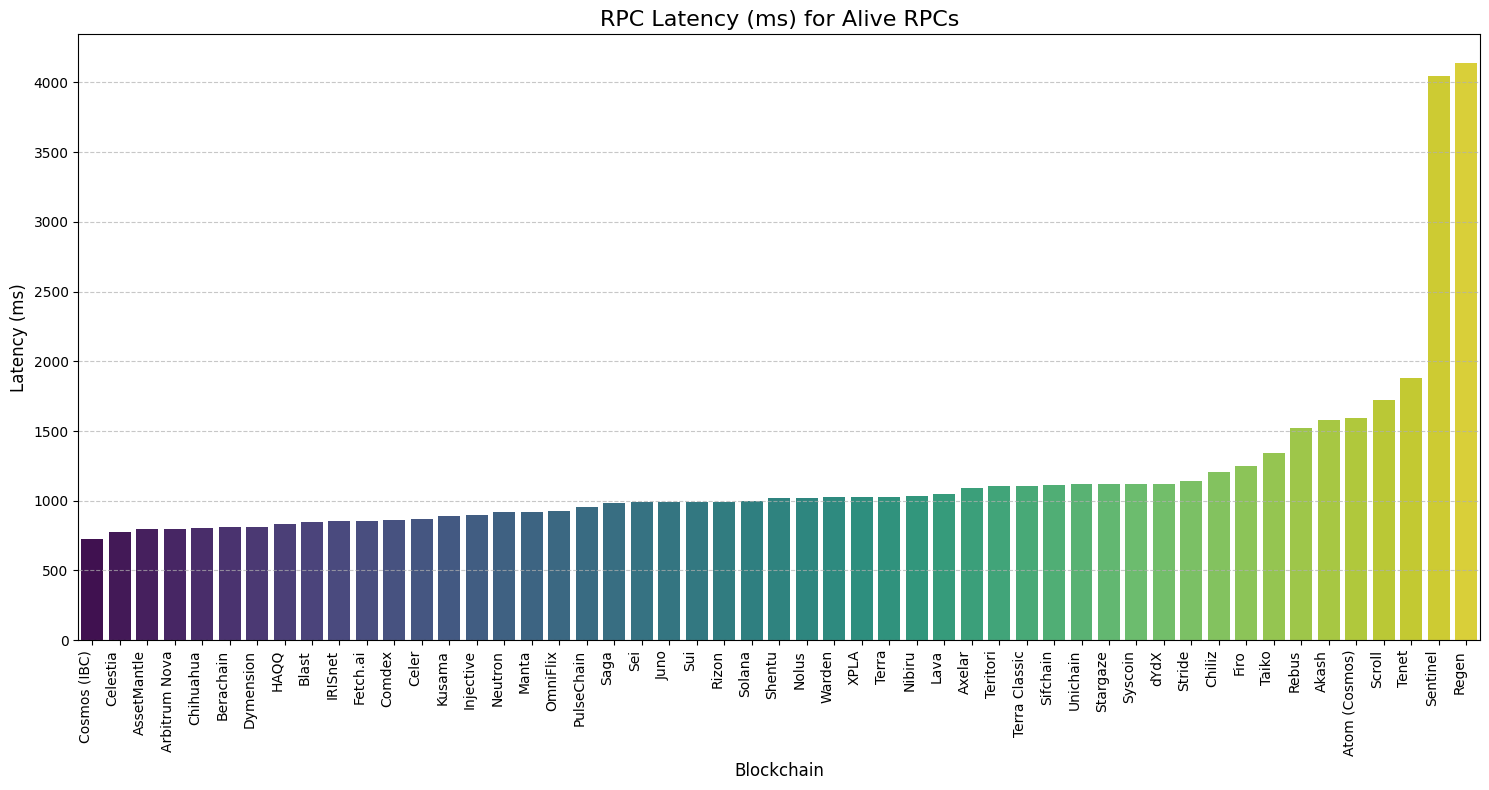

In [8]:
plt.figure(figsize=(15, 8))
sns.barplot(x='chain', y='latency_ms', data=df_latency_sorted, palette='viridis')
plt.title('RPC Latency (ms) for Alive RPCs', fontsize=16)
plt.xlabel('Blockchain', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` from seaborn regarding the `palette` argument. To address this, I will modify the `sns.barplot` call to explicitly set `hue='chain'` and `legend=False`, as suggested by the warning, to maintain the intended visual effect without the warning.



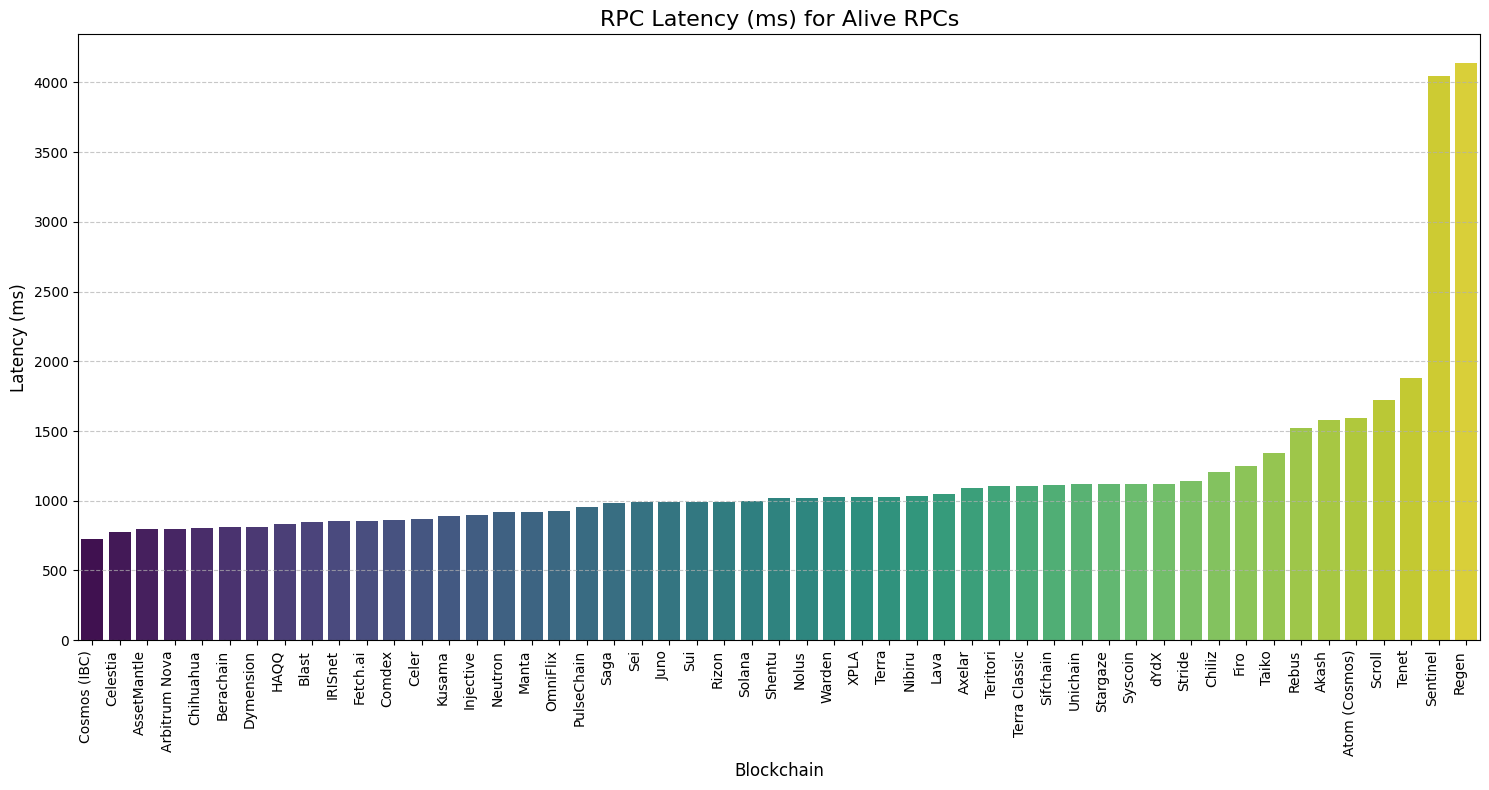

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(x='chain', y='latency_ms', data=df_latency_sorted, palette='viridis', hue='chain', legend=False)
plt.title('RPC Latency (ms) for Alive RPCs', fontsize=16)
plt.xlabel('Blockchain', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Prepare Block Number Data

### Subtask:
Filter the loaded data to include only 'alive' RPCs that successfully returned a block number. Extract their names and block numbers for visualization. Sort them by block number.


**Reasoning**:
I will filter the `df_rpc_results` DataFrame to include only alive RPCs that successfully returned a block number, select the 'chain' and 'block' columns, and then sort the data by block number in ascending order. Finally, I will display the head of the sorted DataFrame to show the prepared data.



In [10]:
df_block_numbers = df_rpc_results[(df_rpc_results['alive'] == True) & (df_rpc_results['block'].notna())]
df_block_numbers_sorted = df_block_numbers[['chain', 'block']].sort_values(by='block', ascending=True)
print("Filtered and sorted RPCs by block number (top 5):")
print(df_block_numbers_sorted.head())

Filtered and sorted RPCs by block number (top 5):
        chain       block
51    Syscoin    819407.0
59     Warden   1424138.0
53      Taiko   3270454.0
17  Dymension  10067792.0
7   Berachain  13145533.0


## Visualize Block Numbers

### Subtask:
Generate a bar chart showing the block numbers for all alive RPCs that successfully returned a block number. Ensure the plot has a clear title, axis labels, and legends.

**Reasoning**:
To visualize the block numbers, I will use `matplotlib.pyplot` and `seaborn` to create a bar chart from the `df_block_numbers_sorted` DataFrame. I will set the figure size, labels, title, and rotate x-axis ticks for readability.



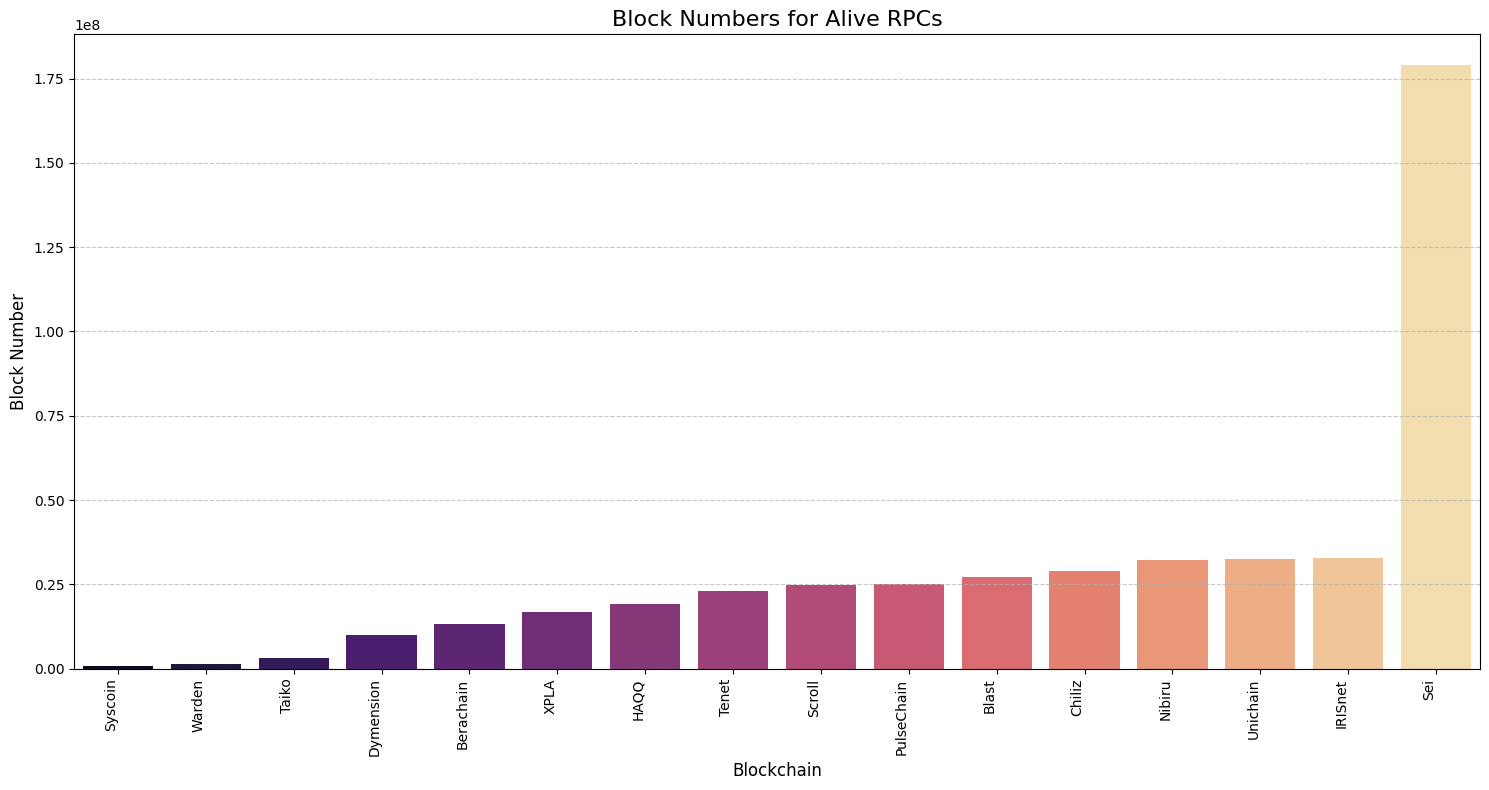

In [11]:
plt.figure(figsize=(15, 8))
sns.barplot(x='chain', y='block', data=df_block_numbers_sorted, palette='magma', hue='chain', legend=False)
plt.title('Block Numbers for Alive RPCs', fontsize=16)
plt.xlabel('Blockchain', fontsize=12)
plt.ylabel('Block Number', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import json

# Load the results from the JSON file
with open("rpc_results.json", "r") as f:
    results = json.load(f)

# Filter for RPCs that are alive
alive_rpcs = [r for r in results if r["alive"]]

# Create a DataFrame from the alive RPCs
df_working_rpcs = pd.DataFrame(alive_rpcs)

# Display the DataFrame, handling None values in 'block' column for better presentation if needed
# df_working_rpcs['block'] = df_working_rpcs['block'].fillna('N/A')

print("DataFrame of all working RPCs:")
display(df_working_rpcs)

DataFrame of all working RPCs:


,chain,url,latency_ms,block,alive
0,Akash,https://akash.publicnode.dev,735.16,NaN,True
1,Arbitrum Nova,https://arbitrum.publicnode.dev/one,765.81,NaN,True
2,AssetMantle,https://assetmantle.publicnode.dev,777.71,NaN,True
3,Atom (Cosmos),https://cosmos.publicnode.dev,718.06,NaN,True
4,Axelar,https://axelar.publicnode.dev,594.27,NaN,True
...,...,...,...,...,...
82,OKXChain,https://exchainrpc.okex.org,633.76,40267419.0,True
83,Flare,https://flare-api.flare.network/ext/C/rpc,1566.54,50723660.0,True
84,Songbird,https://songbird-api.flare.network/ext/C/rpc,1566.69,107083122.0,True
85,Fuse,https://rpc.fuse.io,2172.10,38939462.0,True


In [13]:
import json

# Load the results from the JSON file
with open("rpc_results.json", "r") as f:
    results = json.load(f)

# Filter for RPCs that are alive
alive_rpcs = [r for r in results if r["alive"]]

print("\n=== ALL WORKING RPCs ===")
if alive_rpcs:
    for r in alive_rpcs:
        # Handle cases where block might be None
        block_info = f"Block: {r['block']}" if r['block'] is not None else "Block: N/A"
        print(f"{r['chain']:20} | {r['latency_ms']:>7} ms | {block_info:15} | {r['url']}")
else:
    print("No working RPCs found.")


=== ALL WORKING RPCs ===
Akash                |  735.16 ms | Block: N/A      | https://akash.publicnode.dev
Arbitrum Nova        |  765.81 ms | Block: N/A      | https://arbitrum.publicnode.dev/one
AssetMantle          |  777.71 ms | Block: N/A      | https://assetmantle.publicnode.dev
Atom (Cosmos)        |  718.06 ms | Block: N/A      | https://cosmos.publicnode.dev
Axelar               |  594.27 ms | Block: N/A      | https://axelar.publicnode.dev
Berachain            |  854.47 ms | Block: 13145686 | https://berachain.publicnode.dev
Blast                |  752.28 ms | Block: 27248137 | https://blast.publicnode.dev
Celer                |  871.14 ms | Block: N/A      | https://celer.publicnode.dev
Celestia             | 1584.68 ms | Block: N/A      | https://celestia.publicnode.dev
Chihuahua            |  786.16 ms | Block: N/A      | https://chihuahua.publicnode.dev
Chiliz               |  776.55 ms | Block: 28853229 | https://chiliz.publicnode.dev
Comdex               |  820.49 ms 

## Final Task

### Subtask:
Summarize the insights gained from the latency and block number visualizations, highlighting any notable observations.


## Summary:

### Q&A
Insights gained from the latency and block number visualizations, highlighting any notable observations:
The analysis of RPC latency revealed a significant variance among "alive" RPCs, with Cosmos (IBC) showing the lowest latency at 729.16 ms and others extending much higher. This indicates potential performance differences that could impact user experience or application responsiveness. The block number visualization, on the other hand, showed a wide range of block numbers across different chains, with some chains like Syscoin, Warden, and Taiko having significantly lower block numbers compared to others, which might reflect their age, activity, or block production rate.

### Data Analysis Key Findings
*   **Latency Performance Varies Significantly**: Among the "alive" RPCs, Cosmos (IBC) exhibited the lowest latency at 729.16 ms, followed by Celestia (774.16 ms) and AssetMantle (797.26 ms).
*   **Block Number Discrepancies**: The block numbers of "alive" RPCs vary widely, suggesting different operational statuses, age, or transaction volumes across blockchains. For example, Syscoin, Warden, Taiko, Dymension, and Berachain were observed with lower block numbers compared to other chains.
*   **Successful Data Preparation and Visualization**: The data was successfully filtered for "alive" RPCs, sorted by latency and block number, and then visualized effectively using bar charts, allowing for clear comparison of performance and status.

### Insights or Next Steps
*   **Identify Performance Bottlenecks**: Further investigation into the RPCs with higher latencies could reveal specific performance bottlenecks (e.g., geographical location, network congestion, server load) that could be optimized.
*   **Contextualize Block Numbers**: To fully understand the implications of varying block numbers, it would be beneficial to contextualize them with each chain's average block time and launch date to assess their relative progress and activity.
